# Plasma Beta in the Solar Atmosphere and Wind


This notebook calculates the plasma $β$ in different regions of the solar atmosphere.

## Contents

1. [Introduction](#Introduction)
2. [Quiet photosphere](#Quiet-photosphere)
3. [Sunspot photosphere](#Sunspot-photosphere)
4. [Solar chromosphere](#Solar-chromosphere)
5. [Solar corona](#Solar-corona)
6. [Solar wind](#Solar-wind)

## Introduction

[Plasma beta]: https://en.wikipedia.org/wiki/Beta_(plasma_physics)

[Plasma beta] ($β$) is one of the most fundamental plasma parameters. $β$ is the ratio of the thermal plasma pressure to the magnetic pressure:

$$β = \frac{p_{therm}}{p_{mag}} = \frac{8\pi n kT}{B^2}.$$

How a plasma behaves depends strongly on $β$. When $β ≫ 1$, the magnetic field is not strong enough to significantly alter the dynamics, so the plasma motion is more gas-like. When $β ≪ 1$, magnetic tension and magnetic pressure dominate the dynamics. 

Let's use [plasmapy.formulary.beta](https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.dimensionless.beta.html#plasmapy.formulary.dimensionless.beta) to compare $β$ in different parts of the solar atmosphere.

In [1]:
import astropy.units as u

from plasmapy.formulary import beta

## Quiet photosphere

Let's specify some characteristic plasma parameters for the solar photosphere.

In [2]:
T_photosphere = 5800 * u.K
n_photosphere = 1e17 * u.cm**-3
B_photosphere = 400 * u.G

When we calculate β for the photosphere, we find that it is an order of magnitude larger than 1, so plasma pressure gradient forces are more important than magnetic forces. Change the cell below from Markdown to Code and fill in the names of our quantities in the appropriate order to calculate beta.

beta(TEMP, DENSITY, B)

## Sunspot photosphere

The magnetic field in the solar photosphere is strongest in sunspots, so we would expect β to be lowest there. Let's estimate some plasma parameters for a sunspot. (The density is approximately the same as the photosphere.)

In [4]:
T_sunspot = 4500 * u.K
B_sunspot = 2 * u.kG

When we calculate β, we find that both pressure gradient and magnetic forces will be important. Input the appropriate quantities in the cell below to calculate beta for the photosphere.

In [5]:
beta(, , )

<Quantity 0.39036931>

## Solar chromosphere

Next let's calculate $β$ for the chromosphere. [Bogod et al. (2015)](https://doi.org/10.1007/s11207-014-0526-6) found that the quiet chromosphere ranges from ∼40–200 G. We can use a python list, specified with brackets, to calculate $\beta$ for the upper and lower bounds of this range. The temperature and number density of hydrogen are taken from model C7 of [Avrett & Loeser (2007)](https://doi.org/10.1086/523671) for 1 Mm above the photosphere.

In [6]:
T_chromosphere = 6225 * u.K
n_chromosphere = 2.711e13 * u.cm**-3
B_chromosphere = [40, 200] * u.G

In [7]:
beta(, , )

<Quantity [0.36599237, 0.01463969]>

The output should give you a bracketed list of two values for $\beta$. When $B$ is small, $\beta$ is not too far from 1, which means that both magnetic and plasma pressure gradient forces are important when the chromospheric magnetic field is relatively weak. When near the higher range of $B$, $\beta$ is small so that the magnetic forces are more important than plasma pressure gradient forces.

## Solar corona

Let's start by defining some plasma parameters for an active region in the solar corona.

In [8]:
T_corona = 1 * u.MK
n_corona = 1e9 * u.cm**-3
B_corona = 50 * u.G

In [9]:
beta(, , )

<Quantity 0.00138798>

We find that $β$ is quite small which implies that the corona is magnetically dominated.

## Solar Wind

Though the values vary widely in the solar wind, generally $\beta < 1$. Let's take a few measured values:

In [10]:
T_wind = 6*10**5*u.K
n_wind = 2.5*10**(-5)*u.m**-3
B_wind = 0.001*u.G

In [11]:
beta(, , )

<Quantity 5.20492411e-14>

The temperature, density and magnetic field of the solar wind all change as the wind blows out into the heliosphere. Dr. Eugene Parker predicted the density and magnetic field would decrease as $1/r^2$, which is what we observe. However, the temperature actually goes like $1/r^{2\gamma}$, staying hotter than we expect. We don't yet know the correct value of $\gamma$ that would match observation, but we know it is less than 1. Use the code below to plot how $T$ changes for different values of $\gamma$.

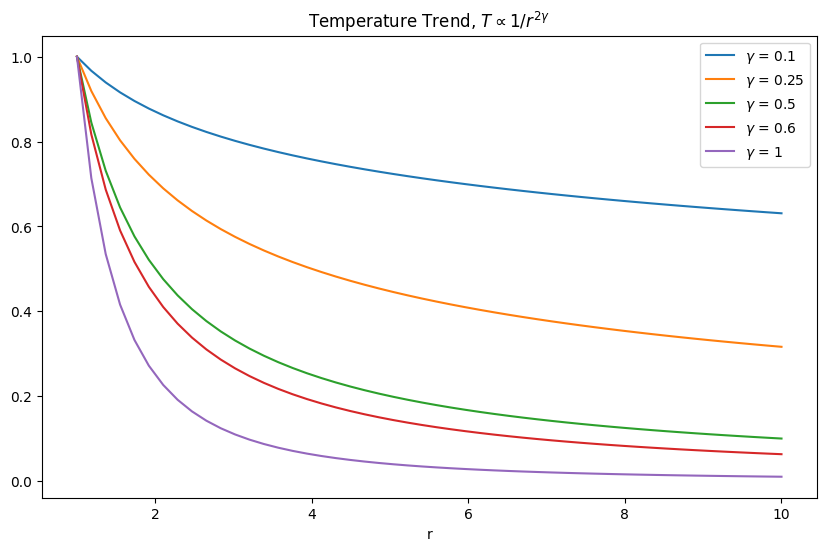

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def plot_functions(gamma_values):
    r = np.linspace(1, 10, 50)  # Avoid division by zero and create a range of r values
    plt.figure(figsize=(10, 6))  # Set the figure size
    for g in gamma_values:
        y = 1/r**(2*g)
        plt.plot(r, y,label=r'$\gamma$ = '+str(g))

    # Set the plot title and labels
    plt.title(r'Temperature Trend, $T\propto 1/r^{2\gamma}$')
    plt.xlabel('r')
    plt.legend()  # Show the legend
    plt.show()  # Display the plot

# Call the function with a list of g values
plot_functions([0.1, 0.25, 0.5, 0.6,1])

The $\gamma=1$ purple line is how the temperature would normally be expected to drop. Because of the $\gamma<1$, $\beta$ actually increases at a rate of $r^\gamma$.

$$\beta \propto \frac{nT}{B^2} \propto r^{-2} r^{-2\gamma} r^{-4} = r^{\gamma} $$

Use the code below to plot the simple function $r^\gamma$ to see how the trend in $\beta$ would vary with different $\gamma$ values.

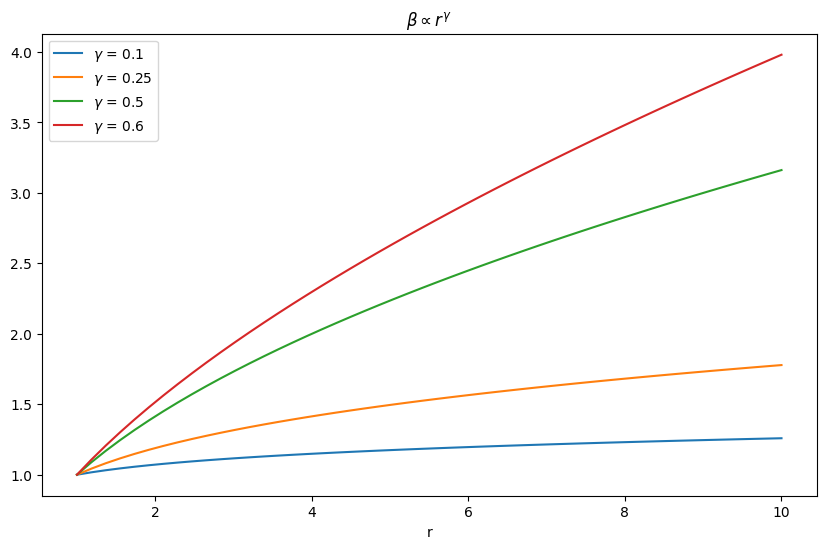

In [28]:
# Define the function to plot
def plot_functions(gamma_values):
    r = np.linspace(1, 10, 50)  # Avoid division by zero and create a range of r values
    plt.figure(figsize=(10, 6))  # Set the figure size
    for g in gamma_values:
        y = r**(g)
        plt.plot(r, y,label=r'$\gamma$ = '+str(g))

    # Set the plot title and labels
    plt.title(r'$\beta\propto r^\gamma$')
    plt.xlabel('r')
    plt.legend()  # Show the legend
    plt.show()  # Display the plot

# Call the function with a list of g values
plot_functions([0.1, 0.25, 0.5, 0.6])
